# Comments classification: offensive/non-offensive

1. Import Dataset

In [7]:
import pandas as pd
df = pd.read_csv('Dataset/CVMAD_04.csv', encoding='UTF-8')### if it doesn't work try 'utf-8-sig'
df.head()

,content,decision
0,یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهت...,1
1,یاک مطلقها علاش کیحاسبها داب,1
2,یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعص...,1
3,يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح الت...,0
4,يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب ا...,0


In [8]:
import seaborn as sns # visulization
sns.countplot(x=df['decision'])

2. Data pre-processing

In [9]:
import re
def removeWeirdChars(text):
    weirdPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weirdPatterns.sub(r'', text)

In [10]:
data = [removeWeirdChars(d) for d in df.content]

In [11]:
data[0:10]

['یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهتو المغرب',
 'یاک مطلقها علاش کیحاسبها داب',
 'یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعصیه قبل اقترافها۔هادا حال نکبة الانترنت صار وسیله للتفاخر بالجریمه والمعصیه قبل الاقدام علیها۔بالامس القریب انتحر شاب بمقتبل العمر بتطوان وقبل الانتحار کتب او تفاخر بلفیس انه مل من لحیاة وسینتحر والیوم واحد مدمن مقرقب حباس یبرر تشریمله لزوجته وینشر وساخة غسیله امام الناس قبل ان یشرمل زوجته ولم یستحي هذا الدیوث حتی ان یستر او یغطي صدر زوجته وهي بقمیص نوم شفاف امام الکل وغدا ربما سیدخل علینا قاضي بفیدیو یعلن ان لمحکمة عمرات بقضایا وملفات الحباسه ولمشرملین ویصدر احکامه هنا مسبقا عن کل واحد شرمل او اغتصب ولاداعي للمحکمه۔انه زمن التفاهة وغیاب الوعي ولعدل وتوافر کل اسباب الراحه والترفیه بالسجون المغربیه۔',
 'يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح التصويت نزيه بالمغرب بدلاً من 200درهم في 4سنوات للفرد من الأخر وشكرا',
 'يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب الملكي',
 'يوسف رجل',
 'يوسف الزروالي هو لي دخلو لي جمعية شباب الملكي',
 'يوزع شكون فيق سك

3. Data Encoding

In [12]:
lens = df.content.str.len()
lens.mean(), lens.std(), lens.max()

(72.46904347826087, 88.78068237995234, 2352)

In [13]:
max_length = df.content.str.len().max()
print(max_length)

2352


5. Data splitting

In [ ]:
!pip install -q datasets

In [49]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

In [72]:
df.content = [removeWeirdChars(d) for d in df.content]

In [73]:
df = df.rename(columns={'decision':'labels'})

In [74]:
df.head()

,content,labels
0,یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهت...,1
1,یاک مطلقها علاش کیحاسبها داب,1
2,یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعص...,1
3,يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح الت...,0
4,يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب ا...,0


In [75]:
"""We split our dataset into training, validation and test sets."""

train_df, temp_df = train_test_split(df, random_state=42, test_size=0.3)

val_df, test_df = train_test_split(temp_df, random_state=42, test_size=0.5)

len(train_df), len(val_df), len(test_df)

"""We build our dataset object using each DataFrame."""

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

### Classification with BERT

In [4]:
!pip3 install torch

     ------------------------------------ 161.9/161.9 MB 836.0 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -q transformers

In [20]:
import transformers
from transformers import BertTokenizerFast, AutoModelForSequenceClassification, Trainer, TrainingArguments

In [21]:
BERT_MODEL_NAME = 'SI2M-Lab/DarijaBERT-mix'

tokenizer = BertTokenizerFast.from_pretrained(BERT_MODEL_NAME)

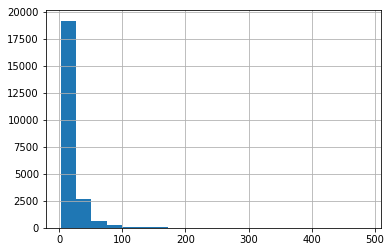

In [22]:
seq_len = [len(tokenizer.encode(i)) for i in data]

pd.Series(seq_len).hist(bins = 20)

In [60]:
def tokenize_function(examples, max_seq_len=50):
  return tokenizer(examples['content'], truncation=True, padding=True, max_length=max_seq_len)

In [76]:
max_seq_len = 50

tokenized_train_ds = train_dataset.map(tokenize_function, batched=True)
tokenized_val_ds = val_dataset.map(tokenize_function, batched=True)
tokenized_test_ds = test_dataset.map(tokenize_function, batched=True)

In [77]:
tokenized_train_ds[0]

{'content': 'Kayna ghir meriyem dounia batma katcheker fiha chetate aila Allah yesseterna',
 'labels': 1,
 '__index_level_0__': 19520,
 'input_ids': [2,
  6082,
  2855,
  20678,
  144885,
  17100,
  18777,
  76926,
  54401,
  3252,
  106270,
  2770,
  61814,
  2295,
  2028,
  7740,
  93921,
  63566,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [63]:
tokenizer.encode_plus(df.loc[0, 'content'], return_token_type_ids=False)

{'input_ids': [2, 191, 1008, 7183, 11957, 2246, 29645, 149, 2614, 86261, 3466, 4422, 19491, 16453, 2520, 2042, 2439, 3], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [64]:
tokenizer("sir jib flouss")

{'input_ids': [2, 3358, 8216, 9408, 1037, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

In [25]:
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SI2M-Lab/DarijaBERT-mix and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
''' Evaluation metrics '''

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [79]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    evaluation_strategy='epoch',     # evaluate at the end of each epoch
    logging_strategy='epoch',        # log at the end of each epoch
    save_total_limit=2,               # limit the number of saved checkpoints to 2
    report_to='none'
    )

PyTorch: setting up devices


In [80]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model 
    args=training_args,                  # training arguments
    train_dataset=tokenized_train_ds,    # training dataset
    eval_dataset=tokenized_val_ds,       # evaluation dataset
    compute_metrics=compute_metrics      # method we defined before to compute our metrics
    )

trainer.train()

***** Running training *****
  Num examples = 16100
  Num Epochs = 5
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2520
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, content. If __index_level_0__, content are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


Epoch,Training Loss,Validation Loss


Saving model checkpoint to ./results\checkpoint-500
Configuration saved in ./results\checkpoint-500\config.json
Model weights saved in ./results\checkpoint-500\pytorch_model.bin


RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\caffe2\serialize\inline_container.cc:319] . unexpected pos 491555072 vs 491555024

In [ ]:
"""Model predictions"""
prediction_output = trainer.predict(tokenized_test_ds)
prediction_output

prediction_output.predictions

"""The results we achieved in each metric."""

prediction_output.metrics

### Ploting the training and validation loss 